In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Розв'язання задачі NLP на датасеті IMDB класичним шляхом

Розглянемо задачу класифікації сентиментів на датасеті IMDB. Цей датасет містить 50 000 відгуків про фільми, розділених на дві категорії: позитивні та негативні.

**Класичний підхід** до розв'язання цієї задачі полягає в наступному:

1. **Створення словника:** Зібрати всі унікальні слова з датасету та присвоїти кожному слову унікальний ідентифікатор.
2. **Перетворення відгуків у вектори:** Представити кожен відгук як вектор, де кожен елемент вектора відповідає слову зі словника. Значення елемента може бути 1, якщо слово присутнє у відгуку, і 0 в іншому випадку (one-hot encoding), або може представляти частоту слова у відгуку (TF-IDF).
3. **Навчання нейронної мережі:** Використати отримані вектори для навчання нейронної мережі, яка буде класифікувати відгуки на позитивні та негативні.

This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".



In [ ]:
# Завантаження датасету
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Розмір датасету
print("Розмір тренувального датасету:", len(train_data))
print("Розмір тестового датасету:", len(test_data))

Розмір тренувального датасету: 25000
Розмір тестового датасету: 25000


In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# Розподіл класів
unique, counts = np.unique(train_labels, return_counts=True)
print("Розподіл класів у тренувальному датасеті:", dict(zip(unique, counts)))

Розподіл класів у тренувальному датасеті: {0: 12500, 1: 12500}


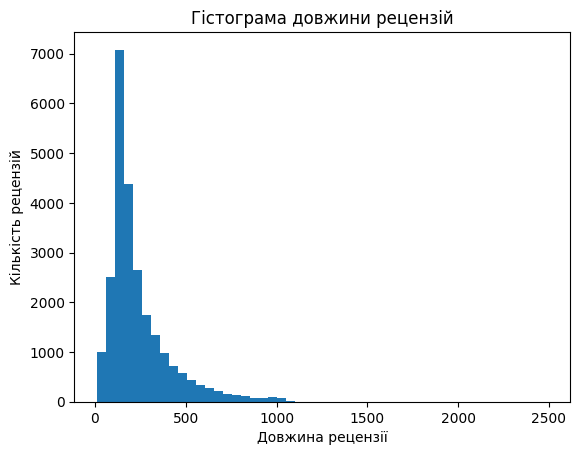

In [ ]:
# Візуалізація довжини рецензій
lengths = [len(review) for review in train_data]
plt.hist(lengths, bins=50)
plt.xlabel("Довжина рецензії")
plt.ylabel("Кількість рецензій")
plt.title("Гістограма довжини рецензій")
plt.show()

In [ ]:
min(lengths), max(lengths)

(11, 2494)

In [ ]:
# Приклад рецензії (після декодування)
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Приклад рецензії:", decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Приклад рецензії: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are 

## Experiments

**NLP (Natural Language Processing):**

NLP - це область штучного інтелекту, яка займається обробкою та розумінням природної мови. NLP включає широкий спектр задач, таких як аналіз тональності тексту, машинний переклад, розпізнавання мовлення та генерація тексту.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Завантаження датасету
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Підготовка даних
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Створення моделі
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)), # Щільний шар з 16 нейронами та функцією активації ReLU
    layers.Dense(16, activation='relu'), # Додатковий щільний шар
    layers.Dense(1, activation='sigmoid') # Вихідний шар з 1 нейроном та функцією активації sigmoid (для бінарної класифікації)
])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Тренування моделі
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.7259 - loss: 0.5909 - val_accuracy: 0.8754 - val_loss: 0.3524
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9076 - loss: 0.2804 - val_accuracy: 0.8874 - val_loss: 0.2848
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9372 - loss: 0.1879 - val_accuracy: 0.8846 - val_loss: 0.2883
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9525 - loss: 0.1470 - val_accuracy: 0.8786 - val_loss: 0.3101
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9637 - loss: 0.1201 - val_accuracy: 0.8765 - val_loss: 0.3306
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9721 - loss: 0.0947 - val_accuracy: 0.8704 - val_loss: 0.3700
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9782 - loss: 0.0782 - val_accuracy: 0.8675 - val_loss: 0.4020
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9862 - loss: 0.0618 - val_accuracy: 0.8646 -

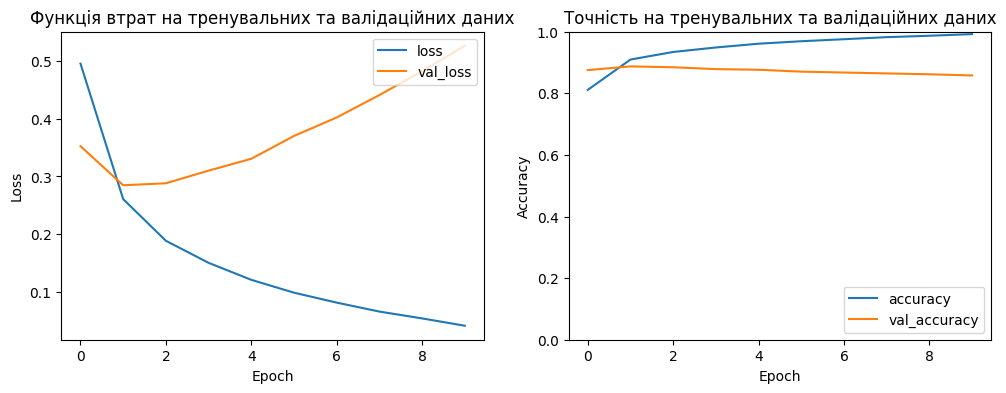

In [ ]:
# Візуалізація процесу навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Функція втрат на тренувальних та валідаційних даних")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.title("Точність на тренувальних та валідаційних даних")

plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8584 - loss: 0.5268
[0.526100218296051, 0.8580399751663208]
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


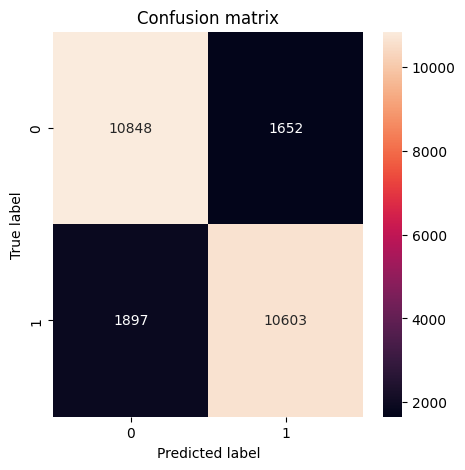

In [ ]:
# Оцінка моделі на тестових даних
results = model.evaluate(x_test, y_test)
print(results)

# Побудова confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Недоліки класичного підходу:**

* **Втрата інформації про порядок слів:** Класичний підхід не враховує порядок слів у відгуку, що може бути важливим для розуміння сентименту. Наприклад, "фільм не поганий" та "не поганий фільм" мають різні значення, але класичний підхід може їх інтерпретувати однаково.
* **Фіксована довжина вектора:** Всі відгуки повинні бути перетворені у вектори однакової довжини, що може призвести до втрати інформації або додавання зайвих нулів.
* **Неефективне використання пам'яті:** One-hot encoding може призвести до створення дуже великих та розріджених векторів, що неефективно використовує пам'ять.


# Рекурентні нейронні мережі (RNN)

**Рекурентні нейронні мережі (RNN)** – це тип нейронних мереж, призначений для обробки **послідовних даних**, де порядок та контекст мають значення. Вони широко використовуються в різних областях, включаючи обробку природної мови (NLP), розпізнавання мови, машинний переклад та прогнозування часових рядів.

<img src="https://miro.medium.com/v2/resize:fit:1200/1*HgAY1lLMYSANqtgTgwWeXQ.png" width="700">

**Що таке послідовні дані?**

Послідовні дані - це дані, в яких порядок елементів має значення. Приклади:

* **Текст:** Слова в реченні або речення в тексті.
* **Мова:** Звукові сигнали в часі.
* **Часові ряди:** Значення, що змінюються в часі (наприклад, температура, ціна акцій).
* **Відео:** Кадри в відеопослідовності.

**Чому традиційні нейронні мережі не підходять для послідовних даних?**

Традиційні нейронні мережі (такі як багатошарові перцептрони) обробляють кожен елемент вхідних даних незалежно, не враховуючи його контекст. Це може призвести до втрати важливої інформації, особливо при обробці послідовних даних.

**Як RNN вирішують цю проблему?**

RNN мають **"пам'ять"**, яка дозволяє їм враховувати попередню інформацію при обробці поточного вводу. Це робиться за допомогою **прихованого стану** ($h_t$), який оновлюється на кожному кроці обробки послідовності.

## Як працює RNN





**Основна ідея RNN:**

RNN обробляє послідовні дані поетапно, враховуючи при цьому інформацію з попередніх кроків. На кожному кроці RNN отримує вхідний елемент ($x_t$) та попередній прихований стан ($h_{t-1}$). RNN обчислює новий прихований стан ($h_t$) на основі цих двох значень.

**Формула:**

$
h_t = f(W_{xh}x_t + W_{hh}h_{t-1} + b_h)
$

де:

* $x_t$ - вхідний елемент на кроці $t$
* $h_{t-1}$ - прихований стан на попередньому кроці
* $W_{xh}$ - матриця ваг, що з'єднує вхід з прихованим станом
* $W_{hh}$ - матриця ваг, що з'єднує попередній прихований стан з поточним
* $b_h$ - вектор зміщення для прихованого стану
* $f$ - функція активації (наприклад, tanh або sigmoid)

**Покрокове пояснення:**

1. **Крок 1:** RNN отримує перший елемент послідовності ($x_1$) та початковий прихований стан ($h_0$), який зазвичай ініціалізується нулями.
2. **Крок 2:** RNN обчислює новий прихований стан ($h_1$) на основі $x_1$ та $h_0$ за допомогою вищевказаної формули.
3. **Крок 3:** RNN отримує другий елемент послідовності ($x_2$) та попередній прихований стан ($h_1$).
4. **Крок 4:** RNN обчислює новий прихований стан ($h_2$) на основі $x_2$ та $h_1$.
5. **Кроки 5-N:** RNN повторює кроки 3-4 для всіх інших елементів послідовності.




<img src="https://miro.medium.com/v2/resize:fit:1400/1*xn5kA92_J5KLaKcP7BMRLA.gif" width="700">

**Вихід RNN:**

На кожному кроці RNN може генерувати вихід ($y_t$) на основі поточного прихованого стану ($h_t$).

**Формула:**

$
y_t = g(W_{hy}h_t + b_y)
$

де:

* $W_{hy}$ - матриця ваг, що з'єднує прихований стан з виходом
* $b_y$ - вектор зміщення для виходу
* $g$ - функція активації (наприклад, softmax для класифікації)

**Різні типи виходів:**

* **Вихід на кожному кроці:** RNN може генерувати вихід на кожному кроці обробки послідовності. Це корисно для задач, таких як розпізнавання мови, де потрібно класифікувати кожен звуковий сигнал.
* **Вихід на останньому кроці:** RNN може генерувати вихід тільки на останньому кроці обробки послідовності. Це корисно для задач, таких як класифікація сентиментів, де потрібно класифікувати весь текст.
* ...

## Подолання проблем класичного підходу за допомогою рекурентних мереж

Для подолання недоліків класичного підходу можна використовувати рекурентні нейронні мережі. RNN обробляють послідовні дані поетапно, враховуючи при цьому інформацію з попередніх кроків.

**Основна ідея RNN:**

RNN мають прихований стан ($h_t$), який оновлюється на кожному кроці обробки послідовності.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*JYgkf1RUbSX0WSm21U4yXg.gif" width="700">

Де можуть використовуватись RNN?

RNN знаходять застосування в багатьох областях, де важливо враховувати порядок та контекст даних.

**NLP:**

* **Класифікація сентиментів:** Визначення позитивного чи негативного настрою у тексті.
* **Машинний переклад:** Переклад тексту з однієї мови на іншу.
* **Генерація тексту:** Створення нового тексту, подібного до заданого.
* **Розпізнавання мови:** Перетворення мови у текст.
* **Чат-боти:** Створення ботів, які можуть спілкуватися з людьми.

**Часові ряди:**

* **Прогнозування:** Передбачення майбутніх значень часового ряду на основі його історії.
* **Аномалія детектування:** Виявлення незвичайних значень у часовому ряду.
* **Класифікація часових рядів:** Розподіл часових рядів на різні категорії.

# Реалізація рекурентної нейронної мережі

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

## Токенізатори


Токенізація - це процес розбиття тексту на окремі одиниці, які називаються токенами. Токенами можуть бути слова, фрази, символи або інші одиниці мови.

**Мета токенізації:**

* **Підготовка тексту для обробки:**  Більшість алгоритмів обробки природної мови (NLP) не можуть працювати безпосередньо з текстом. Токенізація перетворює текст у формат, який може бути оброблений алгоритмами.
* **Виділення значущих одиниць:** Токенізація дозволяє виділити значущі одиниці мови, такі як слова, фрази або символи, які можуть бути використані для подальшого аналізу.

**Різні типи токенізаторів:**

* **Word tokenizer:** Розбиває текст на окремі слова.
* **Sentence tokenizer:** Розбиває текст на окремі речення.
* **Character tokenizer:** Розбиває текст на окремі символи.
* **N-gram tokenizer:** Розбиває текст на послідовності з N токенів (наприклад, біграми - послідовності з двох слів).
* **Regex tokenizer:** Використовує регулярні вирази для розбиття тексту на токени.



<img src="https://docs.openvino.ai/2024/_images/tokenization.svg" width="700">

https://platform.openai.com/tokenizer

**Приклади:**

**1. Word tokenizer:**

```
Текст: "Це приклад речення."
Токени: ["Це", "приклад", "речення", "."]
```

**2. Sentence tokenizer:**

```
Текст: "Це перше речення. Це друге речення."
Токени: ["Це перше речення.", "Це друге речення."]
```

**3. Character tokenizer:**

```
Текст: "Приклад"
Токени: ["П", "р", "и", "к", "л", "а", "д"]
```



### Використання токенізації для датасету IMDB

Токенізація - це важливий крок у попередній обробці тексту для моделей NLP. Вона дозволяє перетворити текст у формат, який може бути оброблений алгоритмами. Для датасету IMDB токенізація використовується для перетворення текстових відгуків у послідовності індексів токенів, які потім можуть бути використані для навчання моделей RNN.



Датасет IMDB містить текстові відгуки про фільми. Для того, щоб використовувати цей датасет для навчання моделей NLP, потрібно спочатку провести токенізацію відгуків.

**Приклад:**

```
Відгук: "movie is good"
Послідовність токенів: [2, 1, 4]
```

Де 2, 1, 4 - індекси слів "movie", "is", "good" у словнику токенізатора.

In [ ]:
# Завантаження датасету
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [ ]:
word_index = keras.datasets.imdb.get_word_index()

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

## Embedding представлення

**Word Embeddings:**

Word embeddings - це спосіб представлення слів у вигляді векторів. Вектори слів відображають семантичну схожість між словами, тобто слова з подібним значенням будуть мати близькі вектори.

Наприклад, вектори слів "кішка" та "собака" будуть ближчими один до одного, ніж вектори слів "кішка" та "автомобіль".

**Представлення слів до моделі:**

Для того, щоб використовувати текстові дані в нейронній мережі, їх потрібно перетворити на числове представлення. Одним з найпоширеніших способів є використання word embeddings.

**Embedding:**

* `Embedding` - це шар, який перетворює цілочисельні вхідні дані (наприклад, індекси слів) у вектори щільного вбудовування (word embeddings).
* **Де використовується:** `Embedding` шар зазвичай використовується в NLP задачах для представлення слів у вигляді векторів.
* **Як використовується:**

```python
layers.Embedding(input_dim, output_dim)
```

* `input_dim`: розмір словника (кількість унікальних слів).
* `output_dim`: розмірність вектора вбудовування.

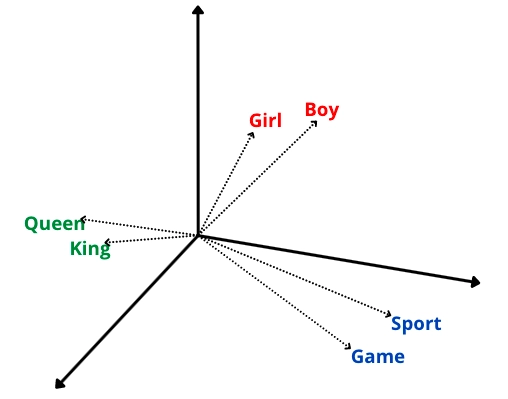

In [ ]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [ ]:
x_train.shape

(25000,)

In [ ]:
len(x_train[0])

218

In [ ]:
X = np.hstack([x_train, x_test])
y = np.hstack([y_train, y_test])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_padded = pad_sequences(X, maxlen=maxlen)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(40000, 500)

In [ ]:
# Створення порожньої моделі Sequential
model = Sequential()

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 64)) # розмір словника та розмір вектора, що представлятимо кожне слово

# Додавання SimpleRNN шару з 128 вузлами
model.add(SimpleRNN(128, activation="tanh")) # кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))

<img src="https://amitness.com/posts/images/i-am-groot-embedding.png" width="300">


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
input_shape = (None, maxlen)
model.build(input_shape)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 664,833 (2.54 MB)

 Trainable params: 664,833 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

## RNN Forward Propagation

**Пряме розповсюдження (forward propagation)** в рекурентній нейронній мережі (RNN) - це процес обчислення виходу мережі для заданої послідовності вхідних даних.

**Позначення:**

* $x_t$ - вхідний вектор на часовому кроці $t$
* $h_t$ - прихований стан на часовому кроці $t$
* $y_t$ - вихідний вектор на часовому кроці $t$
* $W_{xh}$ - матриця ваг, що з'єднує вхідний шар з прихованим шаром
* $W_{hh}$ - матриця ваг, що з'єднує попередній прихований шар з поточним
* $W_{hy}$ - матриця ваг, що з'єднує прихований шар з вихідним шаром
* $b_h$ - вектор зміщення для прихованого шару
* $b_y$ - вектор зміщення для вихідного шару
* $f$ - функція активації для прихованого шару (наприклад, tanh або sigmoid)
* $g$ - функція активації для вихідного шару (наприклад, softmax для класифікації)

**Процес прямого розповсюдження:**

1. **Ініціалізація:** Прихований стан на початковому часовому кроці ($h_0$) ініціалізується нулями або випадковими значеннями.

2. **Обчислення прихованого стану на кожному кроці:** Для кожного часового кроку $t$ від 1 до $T$ (де $T$ - довжина послідовності):

   a. Обчислюється зважена сума вхідного вектора $x_t$ та попереднього прихованого стану $h_{t-1}$:

   $
   z_t = W_{xh}x_t + W_{hh}h_{t-1} + b_h
   $

   b. Застосовується функція активації $f$ до зваженої суми для отримання нового прихованого стану $h_t$:

   $
   h_t = f(z_t)
   $

3. **Обчислення вихідного вектора на кожному кроці (опціонально):**  Якщо RNN генерує вихід на кожному кроці, то для кожного часового кроку $t$:

   a. Обчислюється зважена сума поточного прихованого стану $h_t$:

   $
   o_t = W_{hy}h_t + b_y
   $

   b. Застосовується функція активації $g$ до зваженої суми для отримання вихідного вектора $y_t$:

   $
   y_t = g(o_t)
   $


https://aiml.com/briefly-describe-the-architecture-of-a-recurrent-neural-network-rnn/

<img src="https://aiml.com/wp-content/uploads/2023/10/RNN-Language-model1.png" width="1000">

**Приклад:**

Розглянемо RNN з 3 часовими кроками ($T=3$).

**Крок 1:**

* Вхід: $x_1$
* Попередній прихований стан: $h_0 = 0$
* Обчислення прихованого стану:

   $
   z_1 = W_{xh}x_1 + W_{hh}h_0 + b_h \\
   h_1 = f(z_1)
   $
* Обчислення вихідного вектора (опціонально):
   
   $
   o_1 = W_{hy}h_1 + b_y \\
   y_1 = g(o_1)
   $

**Крок 2:**

* Вхід: $x_2$
* Попередній прихований стан: $h_1$
* Обчислення прихованого стану:
   
   $
   z_2 = W_{xh}x_2 + W_{hh}h_1 + b_h \\
   h_2 = f(z_2)
   $
* Обчислення вихідного вектора (опціонально):
   
   $
   o_2 = W_{hy}h_2 + b_y \\
   y_2 = g(o_2)
   $

**Крок 3:**

* Вхід: $x_3$
* Попередній прихований стан: $h_2$
* Обчислення прихованого стану:
   
   $
   z_3 = W_{xh}x_3 + W_{hh}h_2 + b_h \\
   h_3 = f(z_3)
   $
* Обчислення вихідного вектора (опціонально):
   
   $
   o_3 = W_{hy}h_3 + b_y \\
   y_3 = g(o_3)
   $


https://amitness.com/posts/recurrent-layers-keras

<img src="https://amitness.com/posts/images/rnn-default-keras.png" width="1000">


## Backpropagation Through Time (BPTT)

**Зворотнє розповсюдження (backpropagation)** в рекурентній нейронній мережі (RNN) - це процес обчислення градієнтів функції втрат відносно ваг та зміщень мережі. Ці градієнти використовуються для оновлення ваг та зміщень за допомогою алгоритму оптимізації, такого як градієнтний спуск.

**Зворотнє розповсюдження в часі (BPTT):**

Оскільки RNN обробляє послідовності даних, зворотнє розповсюдження в RNN називається "зворотнім розповсюдженням в часі" (backpropagation through time, BPTT).  BPTT розгортає RNN у часі, перетворюючи її на глибоку нейронну мережу, де кожен шар відповідає одному часовому кроку.

**Позначення:**

* $x_t$ - вхідний вектор на часовому кроці $t$
* $h_t$ - прихований стан на часовому кроці $t$
* $y_t$ - вихідний вектор на часовому кроці $t$
* $W_{xh}$ - матриця ваг, що з'єднує вхідний шар з прихованим шаром
* $W_{hh}$ - матриця ваг, що з'єднує попередній прихований шар з поточним
* $W_{hy}$ - матриця ваг, що з'єднує прихований шар з вихідним шаром
* $b_h$ - вектор зміщення для прихованого шару
* $b_y$ - вектор зміщення для вихідного шару
* $f$ - функція активації для прихованого шару (наприклад, tanh або sigmoid)
* $g$ - функція активації для вихідного шару (наприклад, softmax для класифікації)
* $L$ - функція втрат
* $\frac{\partial L}{\partial w}$ - градієнт функції втрат відносно ваги $w$


<img src="https://raw.githubusercontent.com/mmuratarat/mmuratarat.github.io/master/_posts/images/BPTT.png" width="1000">


**Процес BPTT:**

1. **Обчислення градієнтів вихідного шару:** Для кожного часового кроку $t$ від $T$ до 1:

   a. Обчислюється градієнт функції втрат відносно вихідного вектора $y_t$:

   $
   \frac{\partial L}{\partial y_t} = \frac{\partial L}{\partial o_t} \cdot \frac{\partial o_t}{\partial y_t}
   $

   b. Обчислюється градієнт функції втрат відносно зваженої суми $o_t$:

   $
   \frac{\partial L}{\partial o_t} = \frac{\partial L}{\partial y_t} \cdot g'(o_t)
   $

   c. Обчислюються градієнти функції втрат відносно ваг $W_{hy}$ та зміщення $b_y$:

   $
   \frac{\partial L}{\partial W_{hy}} += \frac{\partial L}{\partial o_t} \cdot h_t^T \\
   \frac{\partial L}{\partial b_y} += \frac{\partial L}{\partial o_t}
   $

2. **Обчислення градієнтів прихованого шару:** Для кожного часового кроку $t$ від $T$ до 1:

   a. Обчислюється градієнт функції втрат відносно прихованого стану $h_t$:

   $
   \frac{\partial L}{\partial h_t} = \frac{\partial L}{\partial o_t} \cdot W_{hy}^T + \frac{\partial L}{\partial h_{t+1}} \cdot W_{hh}^T
   $

   b. Обчислюється градієнт функції втрат відносно зваженої суми $z_t$:

   $
   \frac{\partial L}{\partial z_t} = \frac{\partial L}{\partial h_t} \cdot f'(z_t)
   $

   c. Обчислюються градієнти функції втрат відносно ваг $W_{xh}$, $W_{hh}$ та зміщення $b_h$:

   $
   \frac{\partial L}{\partial W_{xh}} += \frac{\partial L}{\partial z_t} \cdot x_t^T \\
   \frac{\partial L}{\partial W_{hh}} += \frac{\partial L}{\partial z_t} \cdot h_{t-1}^T \\
   \frac{\partial L}{\partial b_h} += \frac{\partial L}{\partial z_t}
   $




https://towardsdatascience.com/backpropagation-in-rnn-explained-bdf853b4e1c2

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*VZlPtuWVVQuj7e-tovTZBA.png" width="1000">


**Оновлення ваг та зміщень:**

Після обчислення градієнтів ваги та зміщення оновлюються за допомогою алгоритму оптимізації, такого як градієнтний спуск:

$
W_{xh} -= \alpha \cdot \frac{\partial L}{\partial W_{xh}} \\
W_{hh} -= \alpha \cdot \frac{\partial L}{\partial W_{hh}} \\
W_{hy} -= \alpha \cdot \frac{\partial L}{\partial W_{hy}} \\
b_h -= \alpha \cdot \frac{\partial L}{\partial b_h} \\
b_y -= \alpha \cdot \frac{\partial L}{\partial b_y}
$

де $\alpha$ - швидкість навчання.

**Примітка:**

Процес BPTT може бути обчислювально дорогим, особливо для довгих послідовностей. Для зменшення обчислювальної складності часто використовують техніку усіченого зворотнього розповсюдження (truncated BPTT), яка обмежує кількість часових кроків, через які поширюються градієнти.


https://www.youtube.com/watch?v=0XdPIqi0qpg

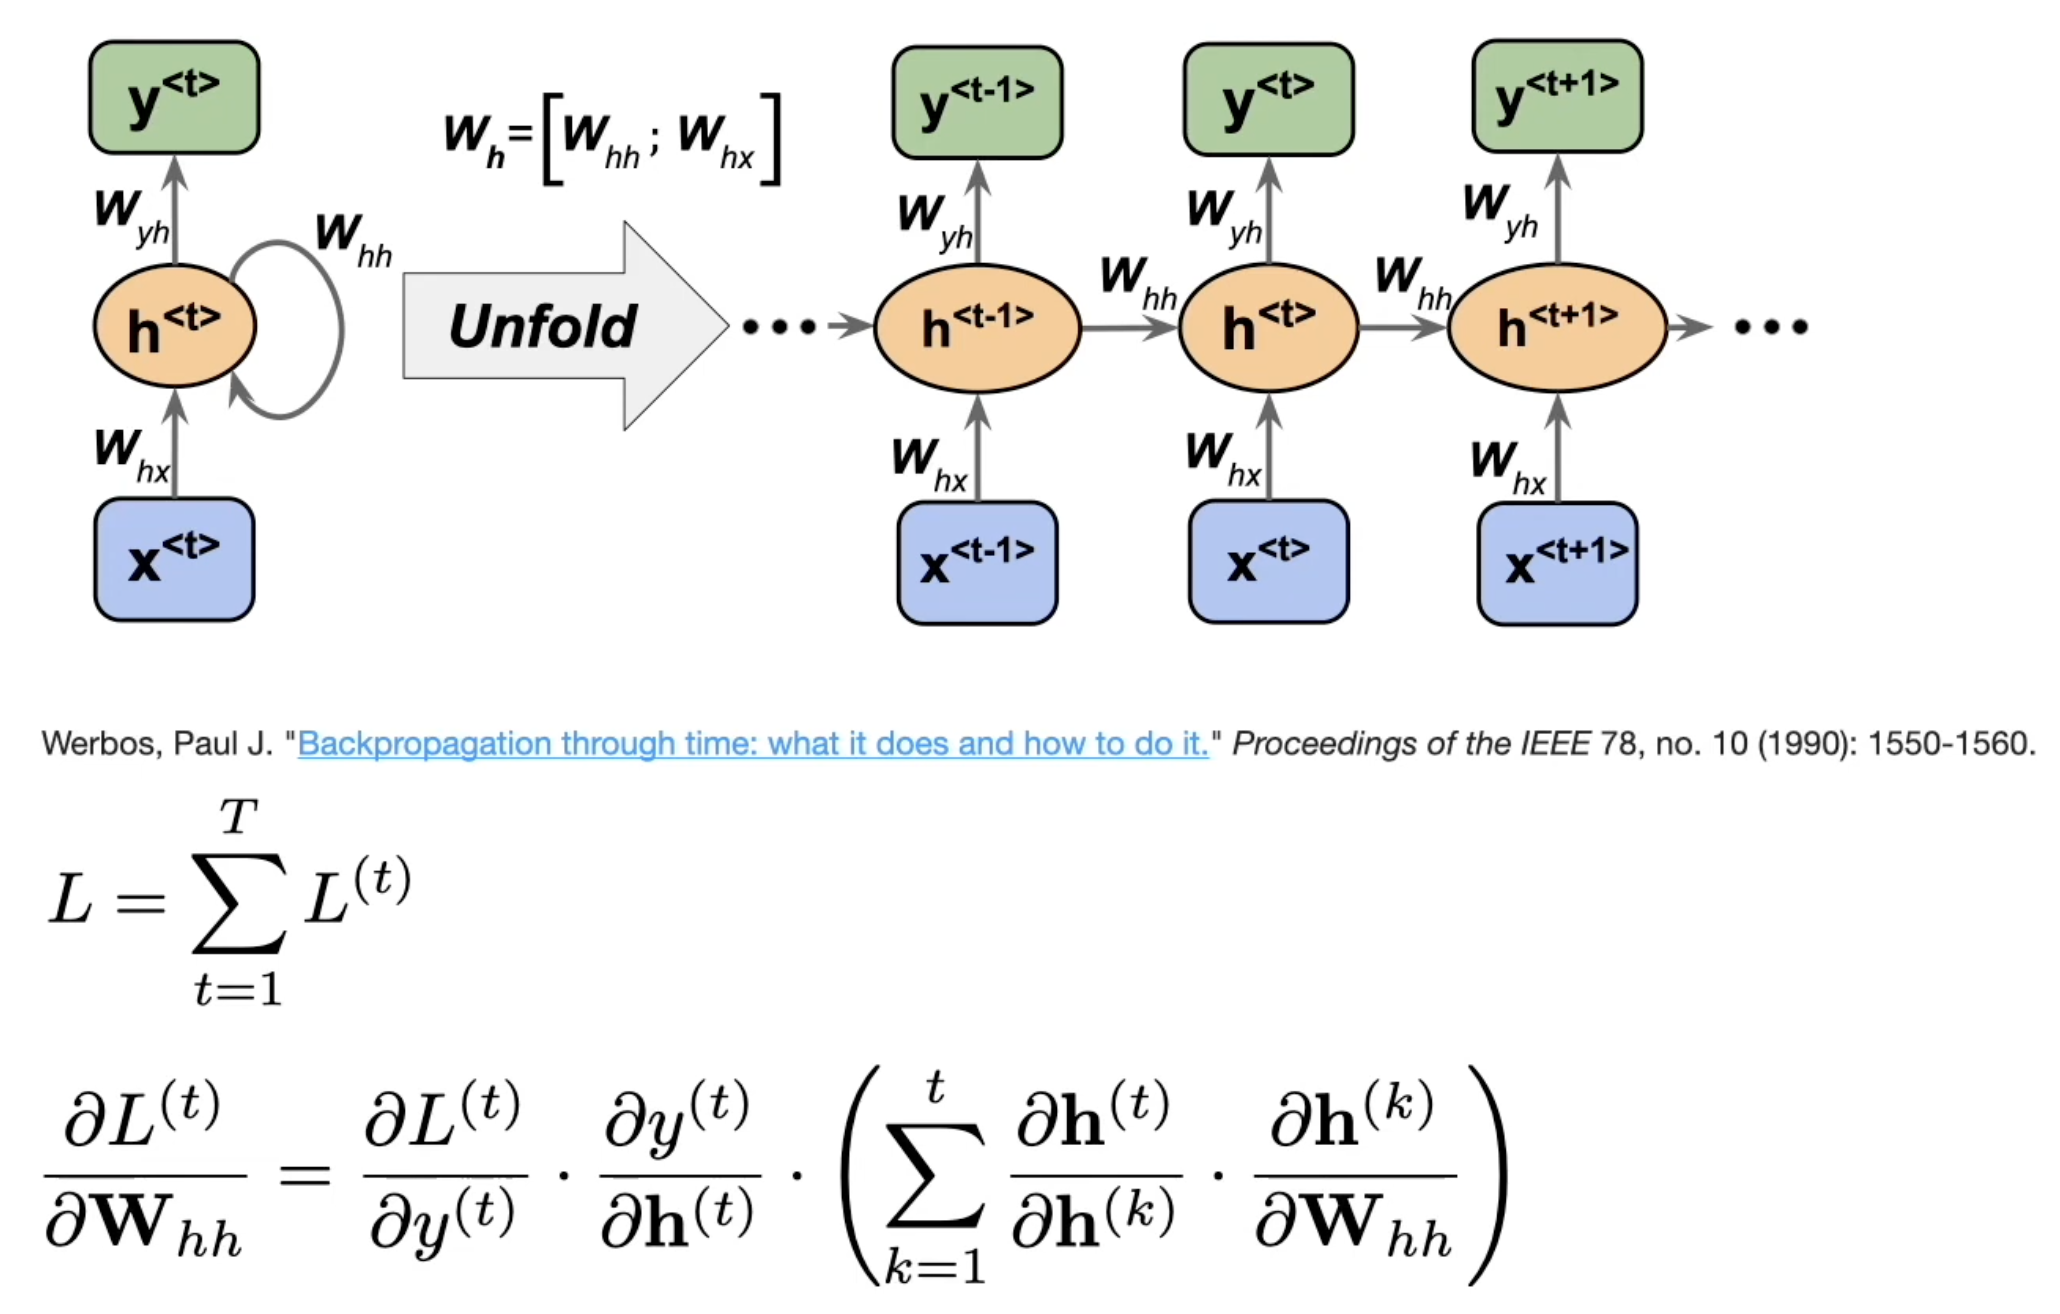

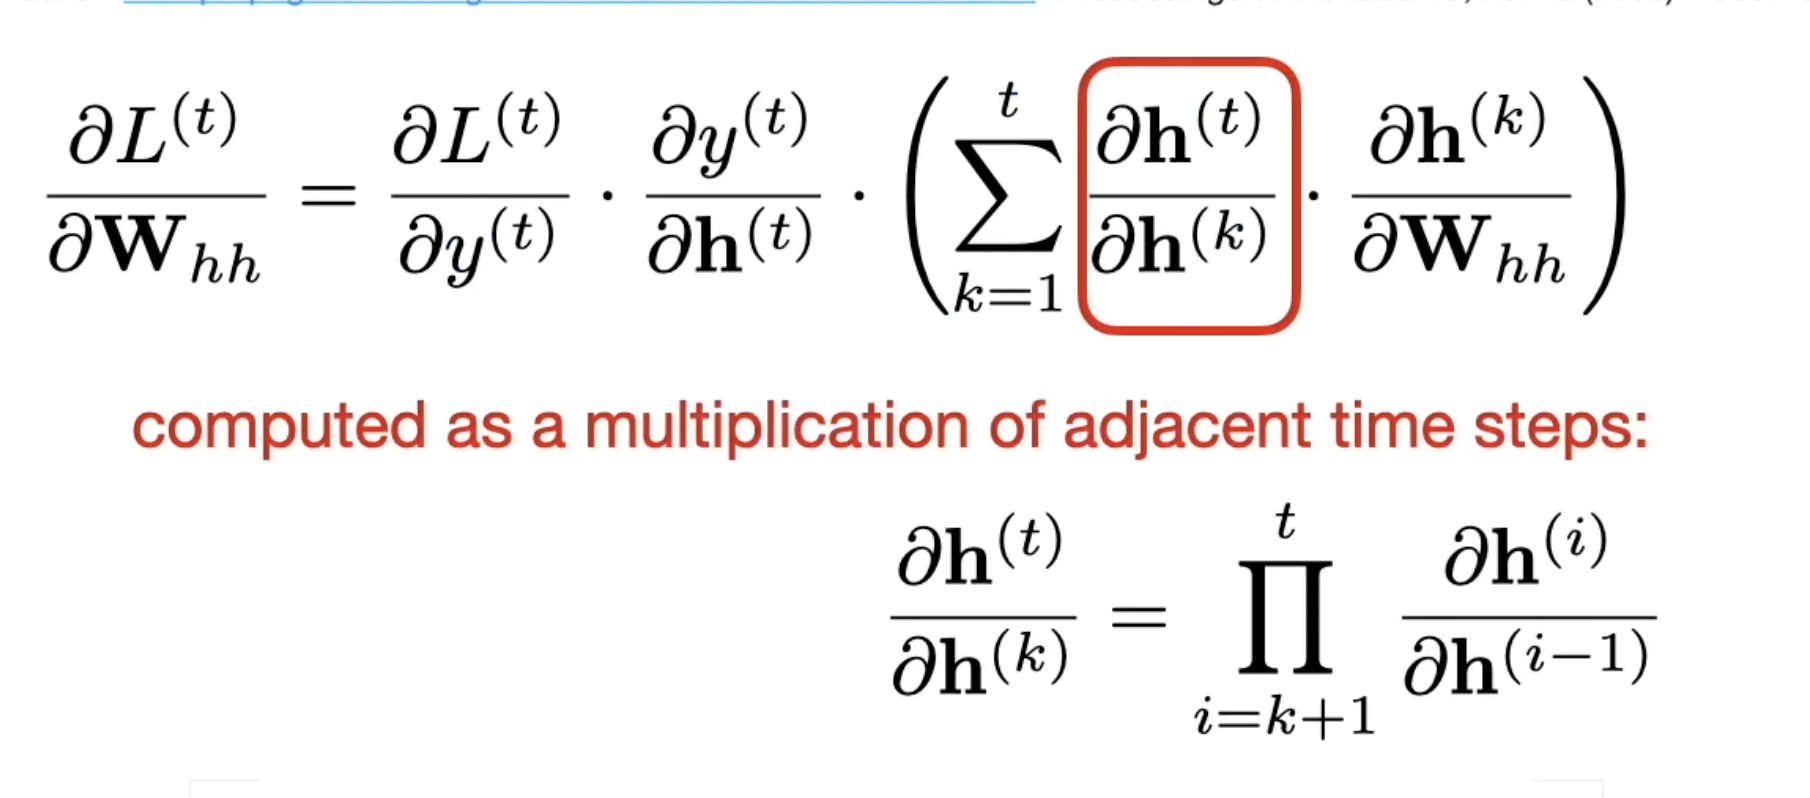

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 57s 54ms/step - accuracy: 0.5763 - loss: 0.6656 - val_accuracy: 0.6793 - val_loss: 0.5941
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.7466 - loss: 0.5145 - val_accuracy: 0.7455 - val_loss: 0.5216
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.8143 - loss: 0.4158 - val_accuracy: 0.7157 - val_loss: 0.5502
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.8454 - loss: 0.3603 - val_accuracy: 0.6430 - val_loss: 0.6174
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.7229 - loss: 0.5424 - val_accuracy: 0.6562 - val_loss: 0.6199


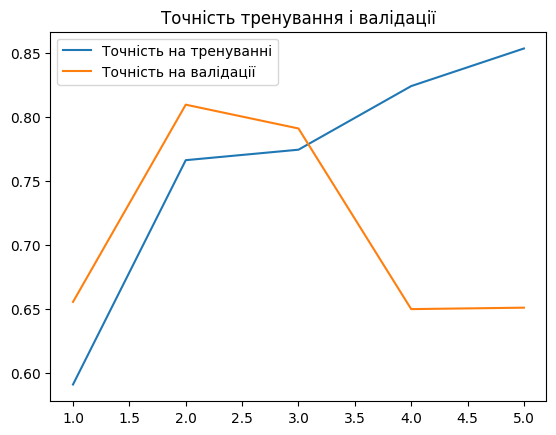

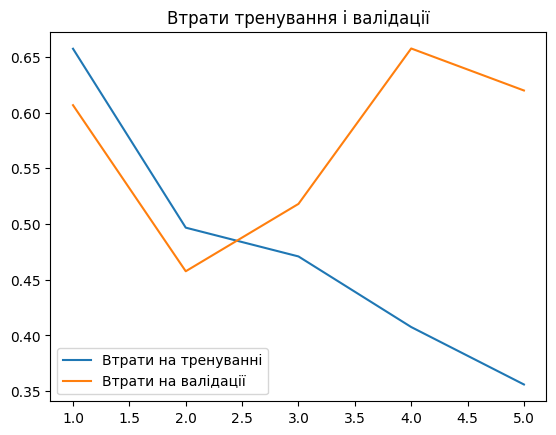

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

# Різні типи RNN

https://medium.com/@shekhawatsamvardhan/types-of-neural-networks-recurrent-neural-networks-7c43bd73e033

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*GcHaABnSiuZLB9nBN2lflg.png" width="800">


Існує багато різних типів архітектур RNN, кожен з яких має свої переваги та недоліки.

* **Vanilla RNN:** Базова RNN, яка описана вище.
* **LSTM (Long Short-Term Memory):** RNN з покращеним механізмом пам'яті, який дозволяє їй краще запам'ятовувати довгострокові залежності.
* **GRU (Gated Recurrent Unit):** Спрощена версія LSTM, яка також ефективно вирішує проблему зникаючого градієнту.
* **Bidirectional RNN (BRNN):** RNN, яка обробляє послідовність в обох напрямках (зліва направо та справа наліво), що дозволяє їй враховувати контекст з обох боків.
* **Deep RNN:** RNN з кількома прихованими шарами, що дозволяє їй вчити більш складні залежності.



# Time-Series Example

Прогнозування кількості пасажирів авіакомпанії з використанням RNN

**Набір даних:** International Airline Passengers (https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv)

Цей набір даних містить щомісячну кількість пасажирів міжнародних авіаліній з 1949 по 1960 рік.



## Завантаження та EDA

In [ ]:
# Завантаження бібліотек та даних:**

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Завантаження даних
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, usecols=[1], engine='python')
data.columns = ['Passengers']

In [ ]:
data

,Passengers
0,0.015444
1,0.027027
2,0.054054
3,0.048263
4,0.032819
...,...
139,0.969112
140,0.779923
141,0.689189
142,0.552124


In [ ]:
data.describe()

,Passengers
count,144.000000
mean,0.340345
std,0.231595
min,0.000000
25%,0.146718
50%,0.311776
75%,0.495174
max,1.000000


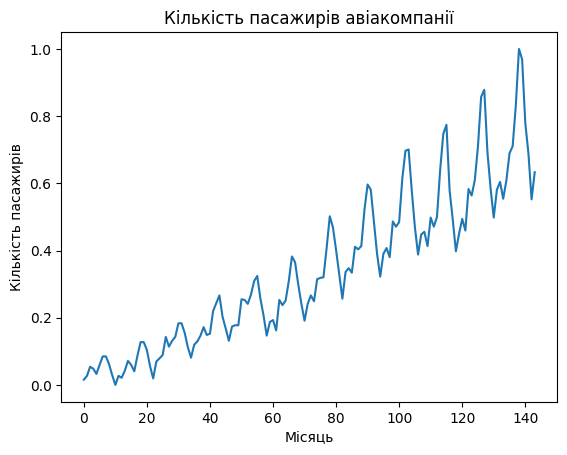

In [ ]:
# Візуалізація часового ряду
plt.plot(data)
plt.title('Кількість пасажирів авіакомпанії')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів')
plt.show()

**Висновки з EDA:**

* Часовий ряд містить 144 спостереження (12 років).
* Спостерігається зростаючий тренд кількості пасажирів.
* Присутня яскраво виражена сезонність - кількість пасажирів збільшується влітку та зменшується взимку.

## Підготовка даних

In [ ]:
# Нормалізуємо дані до діапазону [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data['Passengers'] = scaler.fit_transform(data['Passengers'].values.reshape(-1, 1))

In [ ]:
# Створення вхідних та вихідних послідовностей

# Визначаємо довжину послідовності (кількість попередніх місяців, що використовуються для прогнозу)
sequence_length = 12

# Створюємо вхідні (X) та вихідні (y) послідовності
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data['Passengers'][i:(i + sequence_length)].values)
    y.append(data['Passengers'][i + sequence_length])

X = np.array(X)
y = np.array(y)

In [ ]:
# Розділяємо дані на тренувальний (80%) та тестовий (20%) набори
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Створення та навчання моделі RNN

In [ ]:
# Створюємо модель RNN з одним шаром LSTM
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(1, activation='linear'))

# Компілюємо модель з використанням MSE як функції втрат та Adam як оптимізатора
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mean_squared_error"])

# Навчаємо модель на тренувальних даних
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mean_squared_error: 0.0159 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_squared_error: 0.0138 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_squared_error: 0.0055 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_squared_error: 0.0086 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_squared_error: 0.0033 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_squared_error: 0.0029 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - mean_squared_error: 0.0023 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mean_squared_error: 0.0013 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

# Оцінка моделі та прогнозування

In [ ]:
# Робимо прогнози на тестових даних
y_pred = model.predict(X_test)

# Денормалізуємо прогнози та реальні значення
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

# Обчислюємо MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

MAE: 38.16


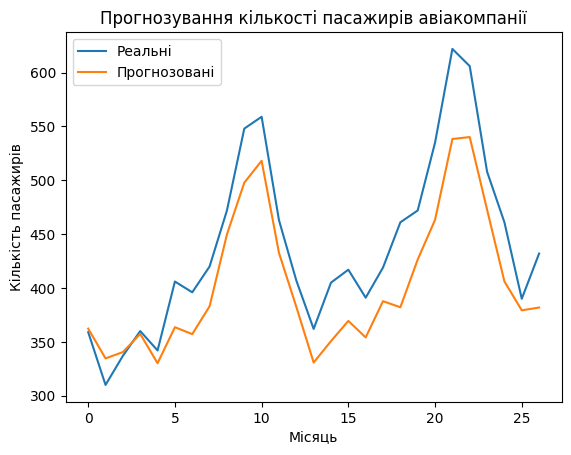

In [ ]:
# Візуалізуємо реальні та прогнозовані значення
plt.plot(y_test, label='Реальні')
plt.plot(y_pred, label='Прогнозовані')
plt.title('Прогнозування кількості пасажирів авіакомпанії')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів')
plt.legend()
plt.show()



## Висновки

* Модель RNN здатна вивчити тренд та сезонність часового ряду.
* MAE показує середню абсолютну помилку прогнозування.
* Для покращення точності моделі можна спробувати змінити архітектуру мережі (наприклад, додати більше шарів LSTM), використовувати інші методи оптимізації та регуляризації, а також експериментувати з довжиною послідовності.



**Висновок**

Рекурентні нейронні мережі - це потужний інструмент для обробки послідовних даних. Вони знаходять застосування в багатьох областях, включаючи NLP та часові ряди. Різні типи RNN дозволяють вибрати найкращу архітектуру для конкретної задачі.


**Примітка:**

Це лише короткий огляд рекурентних нейронних мереж. Для більш глибокого розуміння теми рекомендується вивчити додаткові матеріали та реалізувати власні проекти.